In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Le séparateur de ce dataset n'est pas le classique ','
wines = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
# wines = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=";")

In [3]:
from sklearn.model_selection import train_test_split

Essayons juste de séparer les bons vins des mauvais vins

Disons que les vins de qualité ≤ 6 sont mauvais et ceux ≥ 7 sont bons.

In [4]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wines['quality'] = pd.cut(wines['quality'], bins = bins, labels = group_names)

In [5]:
quality_count = wines["quality"].value_counts()
quality_count

bad     1382
good     217
Name: quality, dtype: int64

(array([1382.,  217.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

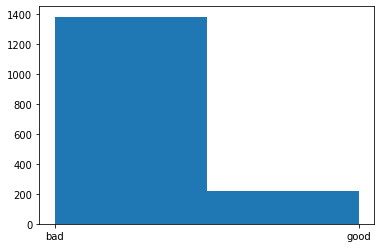

In [6]:
plt.hist(wines.quality, bins=len(quality_count))

In [7]:
# Il faut néamoins retransformer en numérique les labels de qualité
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_quality = LabelEncoder()

In [8]:
wines['quality'] = label_quality.fit_transform(wines['quality'])

In [9]:
y = wines['quality']
X = wines.drop(columns=['quality'])

In [10]:
wines.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     0.135710  
std       0.154386     0.169507     1.065668     0.342587  
min       2.740000     0.330000     8.400000     0.000000  
25%       3.210000     0.550000     9.500000     0.000000  
50%       3.310000     0.620000    10.200000     0.000000  
75%       3.400000     0.730000    11.100000     0.000000  
max       4.010000     2.000000    14.900000     1.000000

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
# pour plus de reproductibilité on fixe la graine du générateur aléatoire

In [12]:
print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (1279, 11)
Test set: (320, 11)


In [13]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(X_train['fixed acidity'], X_train['volatile acidity'], c=y_train, alpha=0.8)
plt.colorbar()
plt.title('Train set')
plt.subplot(122)
plt.scatter(X_test['fixed acidity'], X_test['volatile acidity'],c=y_test, alpha=0.8)
plt.colorbar()
plt.title('Test set')

Text(0.5, 1.0, 'Test set')

In [14]:
# le coup de calibration qui peut aider
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Passons à l'entrainement

In [15]:
from sklearn.metrics import classification_report

## KNeighborsClassifier

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knc = KNeighborsClassifier(n_neighbors=1) # Hyper-paramètre magique ?

knc.fit(X_train, y_train)
pred_knc = knc.predict(X_test)

print('train score:', knc.score(X_train, y_train))
print('test score:', knc.score(X_test, y_test))

train score: 1.0
test score: 0.8875


In [18]:
print(classification_report(y_test, pred_knc))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       274
           1       0.62      0.54      0.58        46

    accuracy                           0.89       320
   macro avg       0.78      0.74      0.76       320
weighted avg       0.88      0.89      0.88       320



## Support Vector Classifier

In [19]:
from sklearn.svm import SVC

In [20]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [21]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       274
           1       0.67      0.30      0.42        46

    accuracy                           0.88       320
   macro avg       0.78      0.64      0.67       320
weighted avg       0.86      0.88      0.86       320



## Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [24]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       274
           1       0.78      0.46      0.58        46

    accuracy                           0.90       320
   macro avg       0.85      0.72      0.76       320
weighted avg       0.89      0.90      0.89       320



## Stochastic Gradient Descent Classifier

In [25]:
from sklearn.linear_model import SGDClassifier

In [26]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

In [27]:
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       274
           1       0.43      0.52      0.47        46

    accuracy                           0.83       320
   macro avg       0.67      0.70      0.69       320
weighted avg       0.85      0.83      0.84       320



On pourrait aussi poursuivre avec un GridSearchCV pour optimiser...

# On boucle avec un GridSearchCV

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

### GridSearchCV avec KNeighborsClassifier

In [29]:
param_grid = {'n_neighbors': np.arange(1, 10),
              'metric': ['euclidean', 'manhattan','minkowski'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute'],
              'weights':['uniform', 'distance']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']})

In [30]:
print(grid.best_score_)
print(grid.best_params_)

0.8968014705882353
{'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'distance'}


In [31]:
model = grid.best_estimator_
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       274
           1       0.67      0.43      0.53        46

    accuracy                           0.89       320
   macro avg       0.79      0.70      0.73       320
weighted avg       0.88      0.89      0.88       320



In [32]:
model.score(X_test, y_test)

0.8875

[ 102  204  306  409  511  613  716  818  920 1023]


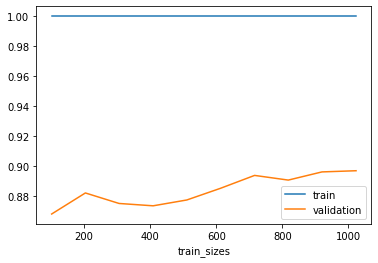

In [33]:
N, train_score, val_score = learning_curve(model, X_train, y_train,
                                           train_sizes=np.linspace(0.1, 1, 10), cv=5)
                                           # train_sizes représente le % de données à utiliser pour modéliser
                                           # l'entrainement
print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

## GridSearchCV avec Support Vector Classifier

In [34]:
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'decision_function_shape': ['ovo', 'ovr']}

grid = GridSearchCV(SVC(), param_grid, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [35]:
print(grid.best_score_)
print(grid.best_params_)

0.8827205882352942
{'decision_function_shape': 'ovo', 'kernel': 'rbf'}


In [36]:
model = grid.best_estimator_
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       274
           1       0.67      0.30      0.42        46

    accuracy                           0.88       320
   macro avg       0.78      0.64      0.67       320
weighted avg       0.86      0.88      0.86       320



In [37]:
model.score(X_test, y_test)

0.878125

In [38]:
N, train_score, val_score = learning_curve(model, X_train, y_train,
                                           train_sizes=np.linspace(0.1, 1, 10), cv=5)
                                           # train_sizes représente le % de données à utiliser pour modéliser
                                           # l'entrainement
print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

[ 102  204  306  409  511  613  716  818  920 1023]


## GridSearchCV avec RandomForestClassifier

In [39]:
param_grid = {'n_estimators': [50, 100, 200, 300, 400, 500],
              'criterion': ['gini', 'entropy'],
              'max_features': ['sqrt', 'log2'],
              'class_weight': ['balanced', 'balanced_subsample']}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 200, 300, 400, 500]})

In [40]:
print(grid.best_score_)
print(grid.best_params_)

0.9116636029411765
{'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 50}


In [41]:
model = grid.best_estimator_
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       274
           1       0.76      0.35      0.48        46

    accuracy                           0.89       320
   macro avg       0.83      0.66      0.71       320
weighted avg       0.88      0.89      0.87       320



In [42]:
model.score(X_test, y_test)

0.890625

[ 102  204  306  409  511  613  716  818  920 1023]


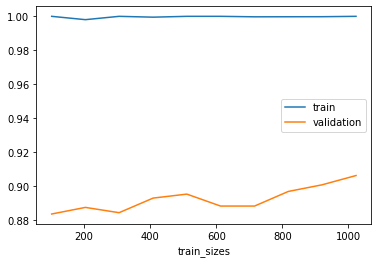

In [43]:
N, train_score, val_score = learning_curve(model, X_train, y_train,
                                           train_sizes=np.linspace(0.1, 1, 10), cv=5)
                                           # train_sizes représente le % de données à utiliser pour modéliser
                                           # l'entrainement
print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()